# E-commerce: Analyzing the product range

The dataset contains the transaction history of an online store that sells household goods. we should find what products we should sell more, what should we exclude and which products are sold together

# Step 1. Open the data file and study the general information

In [1]:
#importing libraries
# TABLE
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from functools import reduce
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', 10)

# GRAPHS
#!pip install plotly
#!pip install plotly -U
#import plotly.express as px
#from plotly import graph_objects as go
#!pip install -U seaborn
#import seaborn as sns
#!pip install -U matplotlib
!python3.7 -m pip install matplotlib
import matplotlib.pyplot as plt

# NULLS
#!pip install -U sidetable
!python3.7 -m pip install sidetable
import sidetable
#!pip install -U missingno
#import missingno as msno

# STATS
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from scipy.cluster.hierarchy import dendrogram, linkage
#from sklearn.cluster import KMeans
#from statsmodels.stats.weightstats import ztest as ztest
!python3.7 -m pip install scipy
from scipy import stats as st
#!pip install -U mlxtend
!python3.7 -m pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

# OTHER
#from datetime import datetime
#from datetime import timedelta
#import math as mt
import numpy as np
#!pip install -U termcolor
#from termcolor import colored

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 3.6 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.3 MB 1.4 MB/s eta 0:00:01


In [2]:
# reading the files
fp = 'ecommerce_dataset_us.csv'
local_filepath = r'C:\Users\Avi\Desktop\D.A\Practicum\Projects\15th project\{}'.format(fp)

try:
    ecommerce = pd.read_csv(local_filepath, sep = '\t', parse_dates = ['InvoiceDate'], dtype = {'CustomerID': 'object'})

except:
    ecommerce = pd.read_csv('/datasets/{}'.format(fp), sep = '\t', parse_dates = ['InvoiceDate'], 
                            dtype = {'CustomerID': 'object'})

# copying the data so it will load faster
ecommerce = ecommerce.copy()

# checking the columns for nulls and type and other info
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


there are missing values, lets see the percentages

In [3]:
# checking the percentage of nulls in each column
ecommerce.stb.missing(style=True)

,missing,total,percent
CustomerID,"135,080","541,909",24.93%
Description,"1,454","541,909",0.27%
InvoiceNo,0,"541,909",0.00%
StockCode,0,"541,909",0.00%
Quantity,0,"541,909",0.00%
InvoiceDate,0,"541,909",0.00%
UnitPrice,0,"541,909",0.00%


In [4]:
# checking the first 10 rows of the data to see the values
ecommerce.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2018-11-29 08:26:00,7.65,17850
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2018-11-29 08:26:00,4.25,17850
7,536366,22633,HAND WARMER UNION JACK,6,2018-11-29 08:28:00,1.85,17850
8,536366,22632,HAND WARMER RED POLKA DOT,6,2018-11-29 08:28:00,1.85,17850
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2018-11-29 08:34:00,1.69,13047


ill lowercase the column names and rename them and lowercase the description

In [5]:
# using describe to see more info
ecommerce.describe(include = 'all')
ecommerce['InvoiceDate'].describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909,541909,540455,541909.000000,541909,541909.000000,406829
unique,25900,4070,4223,NaN,23260,NaN,4372
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2019-10-29 14:41:00,NaN,17841
freq,1114,2313,2369,NaN,1114,NaN,7983
first,NaN,NaN,NaN,NaN,2018-11-29 08:26:00,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-12-07 12:50:00,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,NaN


count                  541909
unique                  23260
top       2019-10-29 14:41:00
freq                     1114
first     2018-11-29 08:26:00
last      2019-12-07 12:50:00
Name: InvoiceDate, dtype: object

there is a negative quantity and in addition its the same amount as the maximum quantity. <br>
also the max quantity is probably some chain or bussiness rather than an individual <br>
same with negative price

also the unique amount of InvoiceNo is bigger than the unique amount of InvoiceDate (while both have no nulls) which means some orders were made in the same minute.
and there are more unique descriptions than unique items - which means that there are items with several different descriptions

# Step 2. Prepare the data

First ill organize the table a bit:

In [6]:
# saving to organized tables
orgnzd_ecommerce = ecommerce.copy()
orgnzd_ecommerce.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850


In [7]:
# lower casing relevant object columns
orgnzd_ecommerce['Description'] = orgnzd_ecommerce['Description'].str.lower()
# Stripping extra spaces in the description
orgnzd_ecommerce['Description'] = orgnzd_ecommerce['Description'].str.strip()
# lower casing column names
orgnzd_ecommerce.columns = orgnzd_ecommerce.columns.str.lower()
#orgnzd_ecommerce = orgnzd_ecommerce.rename(columns = str.lower)
orgnzd_ecommerce.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850


In [8]:
# lower casing object columns
orgnzd_ecommerce['invoiceno'] = orgnzd_ecommerce['invoiceno'].str.lower()
orgnzd_ecommerce['stockcode'] = orgnzd_ecommerce['stockcode'].str.lower()
orgnzd_ecommerce['description'] = orgnzd_ecommerce['description'].str.lower()
orgnzd_ecommerce.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
0,536365,85123a,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850
2,536365,84406b,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850


In [9]:
# renaming date column
orgnzd_ecommerce.rename(columns = {'invoicedate': 'invoice_dt'}, inplace = True)
orgnzd_ecommerce.head(3)

,invoiceno,stockcode,description,quantity,invoice_dt,unitprice,customerid
0,536365,85123a,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850
2,536365,84406b,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850


In [10]:
# adding date column
orgnzd_ecommerce['invoicedate'] = orgnzd_ecommerce['invoice_dt'].astype('datetime64[D]')
orgnzd_ecommerce.head(3)

,invoiceno,stockcode,description,quantity,invoice_dt,unitprice,customerid,invoicedate
0,536365,85123a,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,2018-11-29
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,2018-11-29
2,536365,84406b,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,2018-11-29


i can see the long customerid might be a nuisance if ill add columns - so ill replace it with a shorter one, and of course the correspondng id is saved in the suid table.

In [11]:
# making a table for shorted uid's
suid = orgnzd_ecommerce.drop_duplicates('customerid')
suid = suid.sort_values('customerid').reset_index(drop = True)
suid['suid'] = suid.index + 100
suid = suid[['customerid', 'suid']]
suid['suid'] = suid['suid'].astype('object')
suid.head(3)

,customerid,suid
0,12346,100
1,12347,101
2,12348,102


In [12]:
# adding suid column to the table
orgnzd_ecommerce = orgnzd_ecommerce.merge(suid, how = 'left', on = 'customerid')
# droping the long customerid column
orgnzd_ecommerce = orgnzd_ecommerce.drop('customerid', axis = 1)
orgnzd_ecommerce.head(3)

,invoiceno,stockcode,description,quantity,invoice_dt,unitprice,invoicedate,suid
0,536365,85123a,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,2018-11-29,4148
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,2018-11-29,4148
2,536365,84406b,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,2018-11-29,4148


In [13]:
# checking for duplicates
orgnzd_ecommerce.duplicated().sum()

5268

In [14]:
# looking at the duplicates
orgnzd_ecommerce[orgnzd_ecommerce.duplicated(keep = False)]

,invoiceno,stockcode,description,quantity,invoice_dt,unitprice,invoicedate,suid
485,536409,22111,scottie dog hot water bottle,1,2018-11-29 11:45:00,4.95,2018-11-29,4196
489,536409,22866,hand warmer scotty dog design,1,2018-11-29 11:45:00,2.10,2018-11-29,4196
494,536409,21866,union jack flag luggage tag,1,2018-11-29 11:45:00,1.25,2018-11-29,4196
517,536409,21866,union jack flag luggage tag,1,2018-11-29 11:45:00,1.25,2018-11-29,4196
521,536409,22900,set 2 tea towels i love london,1,2018-11-29 11:45:00,2.95,2018-11-29,4196
...,...,...,...,...,...,...,...,...
541675,581538,22068,black pirate treasure chest,1,2019-12-07 11:34:00,0.39,2019-12-07,1651
541689,581538,23318,box of 6 mini vintage crackers,1,2019-12-07 11:34:00,2.49,2019-12-07,1651
541692,581538,22992,revolver wooden ruler,1,2019-12-07 11:34:00,1.95,2019-12-07,1651
541699,581538,22694,wicker star,1,2019-12-07 11:34:00,2.10,2019-12-07,1651


Team lead said those are not duplicates, its items that got added to the cart separately so we are not to remove them,
and also that we can disregard the nulls in cistomerid (they probably because of some error loading data from the database)

now lets deal with the description nulls

In [15]:
# looking at the rows that dont have description
orgnzd_ecommerce.loc[orgnzd_ecommerce['description'].isna()]

,invoiceno,stockcode,description,quantity,invoice_dt,unitprice,invoicedate,suid
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,2018-11-29,4472
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,2018-11-29,4472
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,2018-11-29,4472
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,2018-11-29,4472
1987,536549,85226a,NaN,1,2018-11-29 14:34:00,0.0,2018-11-29,4472
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2019-12-05 18:26:00,0.0,2019-12-05,4472
535326,581203,23406,NaN,15,2019-12-05 18:31:00,0.0,2019-12-05,4472
535332,581209,21620,NaN,6,2019-12-05 18:35:00,0.0,2019-12-05,4472
536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,2019-12-06,4472


In [16]:
# checking if a stockcode that is null also has a dscription
na_desc = orgnzd_ecommerce.loc[orgnzd_ecommerce['description'].isna()]
not_na_desc = orgnzd_ecommerce.loc[orgnzd_ecommerce['description'].notna()]
for stockcode in na_desc['stockcode']:
    if stockcode in list(not_na_desc['stockcode']):
        print('great')
        break
    else:
        print('bad')

great


In [17]:
# making a new mode func for use in groupby
mode1 = lambda x: x.value_counts().index[0]
# finding the mode description for each stockcode
mode_desc_p_sc = not_na_desc.groupby('stockcode').agg({'description': mode1}).reset_index()
mode_desc_p_sc.head()
mode_desc_p_sc.shape[0]

,stockcode,description
0,10002,inflatable political globe
1,10080,groovy cactus inflatable
2,10120,doggy rubber
3,10123c,hearts wrapping tape
4,10124a,spots on red bookcover tape


3848

In [18]:
# merging both tables on stockcode, dropping the excecive column and renaming the ramining one
orgnzd_ecommerce = orgnzd_ecommerce.merge(mode_desc_p_sc, on = 'stockcode')
orgnzd_ecommerce = orgnzd_ecommerce.drop('description_x', axis = 1)
orgnzd_ecommerce.rename(columns = {'description_y': 'description'}, inplace = True)
orgnzd_ecommerce.head(3)
orgnzd_ecommerce.shape[0]

,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,536365,85123a,6,2018-11-29 08:26:00,2.55,2018-11-29,4148,white hanging heart t-light holder
1,536373,85123a,6,2018-11-29 09:02:00,2.55,2018-11-29,4148,white hanging heart t-light holder
2,536375,85123a,6,2018-11-29 09:32:00,2.55,2018-11-29,4148,white hanging heart t-light holder


541799

In [19]:
# checking i have no null description
orgnzd_ecommerce['description'].isna().sum()

0

now lets take a look at the negative quantity values

In [20]:
# looking at the rows where quantity is negative
orgnzd_ecommerce[orgnzd_ecommerce['quantity'] < 0].reset_index(drop = True).head(10)

,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,c537602,85123a,-1,2018-12-05 12:45:00,2.55,2018-12-05,3901,white hanging heart t-light holder
1,c538350,85123a,-1,2018-12-08 15:01:00,2.55,2018-12-08,1178,white hanging heart t-light holder
2,c538834,85123a,-1,2018-12-12 13:06:00,2.95,2018-12-12,1628,white hanging heart t-light holder
3,c539329,85123a,-500,2018-12-15 09:37:00,2.55,2018-12-15,2808,white hanging heart t-light holder
4,c539576,85123a,-24,2018-12-18 12:25:00,2.95,2018-12-18,1995,white hanging heart t-light holder
5,c539832,85123a,-1,2018-12-20 13:20:00,2.55,2018-12-20,3707,white hanging heart t-light holder
6,c540244,85123a,-1,2019-01-03 15:40:00,2.95,2019-01-03,3685,white hanging heart t-light holder
7,c540403,85123a,-1,2019-01-05 09:32:00,2.55,2019-01-05,3698,white hanging heart t-light holder
8,c540837,85123a,-1,2019-01-09 15:02:00,2.55,2019-01-09,1868,white hanging heart t-light holder
9,c541415,85123a,-1,2019-01-15 16:20:00,2.55,2019-01-15,1543,white hanging heart t-light holder


so its basically returns so ill save them to a different table

In [21]:
# making new tables, 1 for returns and the other purchases
returns = orgnzd_ecommerce[orgnzd_ecommerce['quantity'] < 0].reset_index(drop = True)
returns['quantity'] = returns['quantity'] * -1
purchases = orgnzd_ecommerce[orgnzd_ecommerce['quantity'] > 0].reset_index(drop = True)
returns.head()
returns.shape[0]
purchases.head()
purchases.shape[0]

,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,c537602,85123a,1,2018-12-05 12:45:00,2.55,2018-12-05,3901,white hanging heart t-light holder
1,c538350,85123a,1,2018-12-08 15:01:00,2.55,2018-12-08,1178,white hanging heart t-light holder
2,c538834,85123a,1,2018-12-12 13:06:00,2.95,2018-12-12,1628,white hanging heart t-light holder
3,c539329,85123a,500,2018-12-15 09:37:00,2.55,2018-12-15,2808,white hanging heart t-light holder
4,c539576,85123a,24,2018-12-18 12:25:00,2.95,2018-12-18,1995,white hanging heart t-light holder


10527

,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,536365,85123a,6,2018-11-29 08:26:00,2.55,2018-11-29,4148,white hanging heart t-light holder
1,536373,85123a,6,2018-11-29 09:02:00,2.55,2018-11-29,4148,white hanging heart t-light holder
2,536375,85123a,6,2018-11-29 09:32:00,2.55,2018-11-29,4148,white hanging heart t-light holder
3,536390,85123a,64,2018-11-29 10:19:00,2.55,2018-11-29,3901,white hanging heart t-light holder
4,536394,85123a,32,2018-11-29 10:39:00,2.55,2018-11-29,903,white hanging heart t-light holder


531272

lets investigate the sc's without numbers

In [22]:
# saving all the letter scs
mask1 = orgnzd_ecommerce['stockcode'].str.isalpha()
mask2 = ~orgnzd_ecommerce['stockcode'].str.isalnum()
no_num_sc = orgnzd_ecommerce[mask1 | mask2]['stockcode'].unique().tolist()
no_num_sc

['post',
 'd',
 'dot',
 'm',
 'bank charges',
 's',
 'amazonfee',
 'gift_0001_40',
 'gift_0001_50',
 'gift_0001_30',
 'gift_0001_20',
 'dcgssboy',
 'dcgssgirl',
 'gift_0001_10',
 'pads',
 'b',
 'cruk']

In [23]:
# looking at the rows with those scs
for sc in no_num_sc:
    orgnzd_ecommerce.query('stockcode == @sc').reset_index()

,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,22863,536370,post,3,2018-11-29 08:45:00,18.0,2018-11-29,291,postage
1,22864,536403,post,1,2018-11-29 11:27:00,15.0,2018-11-29,459,postage
2,22865,536527,post,1,2018-11-29 13:04:00,18.0,2018-11-29,361,postage
3,22866,536840,post,1,2018-11-30 18:27:00,18.0,2018-11-30,424,postage
4,22867,536852,post,1,2018-12-01 09:51:00,18.0,2018-12-01,381,postage
...,...,...,...,...,...,...,...,...,...
1251,24114,581493,post,1,2019-12-07 10:10:00,15.0,2019-12-07,161,postage
1252,24115,581494,post,2,2019-12-07 10:13:00,18.0,2019-12-07,239,postage
1253,24116,581570,post,1,2019-12-07 11:59:00,18.0,2019-12-07,361,postage
1254,24117,581574,post,2,2019-12-07 12:09:00,18.0,2019-12-07,246,postage


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,57418,c536379,d,-1,2018-11-29 09:41:00,27.50,2018-11-29,1715,discount
1,57419,c537164,d,-1,2018-12-03 13:21:00,29.29,2018-12-03,1715,discount
2,57420,c537597,d,-1,2018-12-05 12:34:00,281.00,2018-12-05,2429,discount
3,57421,c537857,d,-1,2018-12-06 16:00:00,267.12,2018-12-06,3771,discount
4,57422,c538897,d,-1,2018-12-13 09:14:00,5.76,2018-12-13,3114,discount
...,...,...,...,...,...,...,...,...,...
72,57490,c577227,d,-1,2019-11-16 12:06:00,19.82,2019-11-16,1715,discount
73,57491,c577227,d,-1,2019-11-16 12:06:00,16.76,2019-11-16,1715,discount
74,57492,c578239,d,-1,2019-11-21 12:29:00,26.33,2019-11-21,1996,discount
75,57493,c579884,d,-1,2019-11-28 17:34:00,20.53,2019-11-28,1715,discount


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,273296,536544,dot,1,2018-11-29 14:32:00,569.77,2018-11-29,4472,dotcom postage
1,273297,536592,dot,1,2018-11-29 17:06:00,607.49,2018-11-29,4472,dotcom postage
2,273298,536862,dot,1,2018-12-01 11:13:00,254.43,2018-12-01,4472,dotcom postage
3,273299,536864,dot,1,2018-12-01 11:27:00,121.06,2018-12-01,4472,dotcom postage
4,273300,536865,dot,1,2018-12-01 11:28:00,498.47,2018-12-01,4472,dotcom postage
...,...,...,...,...,...,...,...,...,...
705,274001,581219,dot,1,2019-12-06 09:28:00,1008.96,2019-12-06,4472,dotcom postage
706,274002,581238,dot,1,2019-12-06 10:53:00,1683.75,2019-12-06,4472,dotcom postage
707,274003,581439,dot,1,2019-12-06 16:30:00,938.59,2019-12-06,4472,dotcom postage
708,274004,581492,dot,1,2019-12-07 10:03:00,933.17,2019-12-07,4472,dotcom postage


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,300435,536569,m,1,2018-11-29 15:35:00,1.25,2018-11-29,3007,manual
1,300436,536569,m,1,2018-11-29 15:35:00,18.95,2018-11-29,3007,manual
2,300437,536865,m,1,2018-12-01 11:28:00,2.55,2018-12-01,4472,manual
3,300438,536981,m,2,2018-12-01 14:26:00,0.85,2018-12-01,1861,manual
4,300439,537077,m,12,2018-12-03 11:59:00,0.42,2018-12-03,3584,manual
...,...,...,...,...,...,...,...,...,...
567,301002,580956,m,4,2019-12-04 14:23:00,1.25,2019-12-04,4142,manual
568,301003,c581009,m,-1,2019-12-05 09:15:00,125.00,2019-12-05,3520,manual
569,301004,c581145,m,-1,2019-12-05 13:48:00,9.95,2019-12-05,3883,manual
570,301005,581405,m,3,2019-12-06 13:50:00,0.42,2019-12-06,989,manual


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,356250,536779,bank charges,1,2018-11-30 15:08:00,15.000,2018-11-30,2678,bank charges
1,356251,c537572,bank charges,-1,2018-12-05 12:00:00,95.380,2018-12-05,4472,bank charges
2,356252,c538680,bank charges,-1,2018-12-11 17:10:00,966.920,2018-12-11,4472,bank charges
3,356253,541505,bank charges,1,2019-01-16 15:58:00,15.000,2019-01-16,2757,bank charges
4,356254,c541653,bank charges,-1,2019-01-18 11:50:00,1050.150,2019-01-18,4472,bank charges
5,356255,c544049,bank charges,-1,2019-02-13 12:39:00,566.370,2019-02-13,4472,bank charges
6,356256,c544575,bank charges,-1,2019-02-19 13:58:00,134.760,2019-02-19,4472,bank charges
7,356257,c544576,bank charges,-1,2019-02-19 14:01:00,149.160,2019-02-19,4472,bank charges
8,356258,c544584,bank charges,-1,2019-02-19 14:52:00,109.840,2019-02-19,4472,bank charges
9,356259,c545887,bank charges,-1,2019-03-05 15:54:00,326.680,2019-03-05,4472,bank charges


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,410100,c537581,s,-1,2018-12-05 12:03:00,12.95,2018-12-05,4472,samples
1,410101,c537581,s,-1,2018-12-05 12:03:00,52.00,2018-12-05,4472,samples
2,410102,c544580,s,-1,2019-02-19 14:25:00,5.74,2019-02-19,4472,samples
3,410103,c544580,s,-1,2019-02-19 14:25:00,11.08,2019-02-19,4472,samples
4,410104,c544580,s,-1,2019-02-19 14:25:00,5.79,2019-02-19,4472,samples
...,...,...,...,...,...,...,...,...,...
58,410158,c572347,s,-1,2019-10-22 11:03:00,33.05,2019-10-22,4472,samples
59,410159,572849,s,1,2019-10-24 12:20:00,33.05,2019-10-24,4472,samples
60,410160,c577330,s,-1,2019-11-16 14:16:00,2.89,2019-11-16,4472,samples
61,410161,c577330,s,-1,2019-11-16 14:16:00,75.00,2019-11-16,4472,samples


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,410219,c537600,amazonfee,-1,2018-12-05 12:41:00,1.00,2018-12-05,4472,amazon fee
1,410220,c537630,amazonfee,-1,2018-12-05 15:04:00,13541.33,2018-12-05,4472,amazon fee
2,410221,537632,amazonfee,1,2018-12-05 15:08:00,13541.33,2018-12-05,4472,amazon fee
3,410222,c537644,amazonfee,-1,2018-12-05 15:34:00,13474.79,2018-12-05,4472,amazon fee
4,410223,c537647,amazonfee,-1,2018-12-05 15:41:00,5519.25,2018-12-05,4472,amazon fee
5,410224,c537651,amazonfee,-1,2018-12-05 15:49:00,13541.33,2018-12-05,4472,amazon fee
6,410225,c537652,amazonfee,-1,2018-12-05 15:51:00,6706.71,2018-12-05,4472,amazon fee
7,410226,c540117,amazonfee,-1,2019-01-03 09:55:00,16888.02,2019-01-03,4472,amazon fee
8,410227,c540118,amazonfee,-1,2019-01-03 09:57:00,16453.71,2019-01-03,4472,amazon fee
9,410228,c544587,amazonfee,-1,2019-02-19 15:07:00,5575.28,2019-02-19,4472,amazon fee


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,434659,539492,gift_0001_40,1,2018-12-18 10:14:00,34.04,2018-12-18,4472,dotcomgiftshop gift voucher £40.00
1,434660,548893,gift_0001_40,1,2019-04-02 15:54:00,33.33,2019-04-02,4472,dotcomgiftshop gift voucher £40.00
2,434661,561513,gift_0001_40,1,2019-07-25 15:12:00,33.33,2019-07-25,4472,dotcomgiftshop gift voucher £40.00


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,435748,539958,gift_0001_50,1,2018-12-21 13:26:00,42.55,2018-12-21,4472,dotcomgiftshop gift voucher £50.00
1,435749,552232,gift_0001_50,1,2019-05-04 15:54:00,41.67,2019-05-04,4472,dotcomgiftshop gift voucher £50.00
2,435750,558066,gift_0001_50,1,2019-06-22 15:45:00,41.67,2019-06-22,4472,dotcomgiftshop gift voucher £50.00
3,435751,558614,gift_0001_50,1,2019-06-28 15:56:00,41.67,2019-06-28,4472,dotcomgiftshop gift voucher £50.00


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,436416,540238,gift_0001_30,1,2019-01-03 14:44:00,25.53,2019-01-03,4472,dotcomgiftshop gift voucher £30.00
1,436417,544323,gift_0001_30,1,2019-02-15 15:51:00,25.00,2019-02-15,4472,dotcomgiftshop gift voucher £30.00
2,436418,544434,gift_0001_30,1,2019-02-16 16:12:00,25.00,2019-02-16,4472,dotcomgiftshop gift voucher £30.00
3,436419,555149,gift_0001_30,1,2019-05-29 15:49:00,25.00,2019-05-29,4472,dotcomgiftshop gift voucher £30.00
4,436420,562933,gift_0001_30,1,2019-08-08 16:51:00,25.00,2019-08-08,4472,dotcomgiftshop gift voucher £30.00
5,436421,564760,gift_0001_30,1,2019-08-28 10:47:00,25.00,2019-08-28,4472,dotcomgiftshop gift voucher £30.00
6,436422,564761,gift_0001_30,30,2019-08-28 10:48:00,0.00,2019-08-28,4472,dotcomgiftshop gift voucher £30.00
7,436423,565231,gift_0001_30,1,2019-08-31 09:26:00,25.00,2019-08-31,4472,dotcomgiftshop gift voucher £30.00


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,436424,540238,gift_0001_20,1,2019-01-03 14:44:00,17.02,2019-01-03,4472,dotcomgiftshop gift voucher £20.00
1,436425,540995,gift_0001_20,1,2019-01-11 09:30:00,16.67,2019-01-11,4472,dotcomgiftshop gift voucher £20.00
2,436426,544089,gift_0001_20,1,2019-02-13 17:51:00,16.67,2019-02-13,4472,dotcomgiftshop gift voucher £20.00
3,436427,550474,gift_0001_20,2,2019-04-16 13:58:00,16.67,2019-04-16,4472,dotcomgiftshop gift voucher £20.00
4,436428,550542,gift_0001_20,1,2019-04-17 11:37:00,16.67,2019-04-17,4472,dotcomgiftshop gift voucher £20.00
5,436429,556955,gift_0001_20,10,2019-06-14 09:04:00,0.00,2019-06-14,4472,dotcomgiftshop gift voucher £20.00
6,436430,557500,gift_0001_20,1,2019-06-18 15:27:00,16.67,2019-06-18,4472,dotcomgiftshop gift voucher £20.00
7,436431,558068,gift_0001_20,1,2019-06-22 15:51:00,16.67,2019-06-22,4472,dotcomgiftshop gift voucher £20.00
8,436432,562420,gift_0001_20,1,2019-08-02 16:38:00,16.67,2019-08-02,4472,dotcomgiftshop gift voucher £20.00
9,436433,573585,gift_0001_20,1,2019-10-29 14:41:00,16.67,2019-10-29,4472,dotcomgiftshop gift voucher £20.00


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,441922,543358,dcgssboy,1,2019-02-05 14:04:00,3.29,2019-02-05,4472,boys party bag
1,441923,544599,dcgssboy,1,2019-02-19 18:15:00,3.29,2019-02-19,4472,boys party bag
2,441924,545897,dcgssboy,5,2019-03-05 17:22:00,3.29,2019-03-05,4472,boys party bag
3,441925,546306,dcgssboy,1,2019-03-08 16:16:00,3.29,2019-03-08,4472,boys party bag
4,441926,547249,dcgssboy,6,2019-03-20 09:27:00,3.29,2019-03-20,4472,boys party bag
5,441927,550458,dcgssboy,1,2019-04-16 13:13:00,3.29,2019-04-16,4472,boys party bag
6,441928,552234,dcgssboy,7,2019-05-04 16:01:00,3.29,2019-05-04,4472,boys party bag
7,441929,559923,dcgssboy,20,2019-07-11 16:07:00,3.29,2019-07-11,4472,boys party bag
8,441930,561209,dcgssboy,2,2019-07-23 16:57:00,1.25,2019-07-23,4472,boys party bag
9,441931,568716,dcgssboy,2,2019-09-26 16:13:00,3.29,2019-09-26,4472,boys party bag


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,441933,543358,dcgssgirl,3,2019-02-05 14:04:00,3.29,2019-02-05,4472,girls party bag
1,441934,545897,dcgssgirl,5,2019-03-05 17:22:00,3.29,2019-03-05,4472,girls party bag
2,441935,546306,dcgssgirl,2,2019-03-08 16:16:00,3.29,2019-03-08,4472,girls party bag
3,441936,547249,dcgssgirl,17,2019-03-20 09:27:00,3.29,2019-03-20,4472,girls party bag
4,441937,547250,dcgssgirl,2,2019-03-20 09:30:00,3.29,2019-03-20,4472,girls party bag
5,441938,549524,dcgssgirl,1,2019-04-06 15:42:00,3.29,2019-04-06,4472,girls party bag
6,441939,551997,dcgssgirl,2,2019-05-03 15:47:00,3.29,2019-05-03,4472,girls party bag
7,441940,552234,dcgssgirl,2,2019-05-04 16:01:00,3.29,2019-05-04,4472,girls party bag
8,441941,561209,dcgssgirl,5,2019-07-23 16:57:00,1.25,2019-07-23,4472,girls party bag
9,441942,562933,dcgssgirl,5,2019-08-08 16:51:00,3.29,2019-08-08,4472,girls party bag


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,452406,545895,gift_0001_10,1,2019-03-05 17:14:00,8.33,2019-03-05,4472,dotcomgiftshop gift voucher £10.00
1,452407,550542,gift_0001_10,1,2019-04-17 11:37:00,8.33,2019-04-17,4472,dotcomgiftshop gift voucher £10.00
2,452408,553387,gift_0001_10,1,2019-05-14 16:33:00,8.33,2019-05-14,4472,dotcomgiftshop gift voucher £10.00
3,452409,553389,gift_0001_10,1,2019-05-14 16:37:00,8.33,2019-05-14,4472,dotcomgiftshop gift voucher £10.00
4,452410,558614,gift_0001_10,1,2019-06-28 15:56:00,8.33,2019-06-28,4472,dotcomgiftshop gift voucher £10.00
5,452411,564760,gift_0001_10,1,2019-08-28 10:47:00,8.33,2019-08-28,4472,dotcomgiftshop gift voucher £10.00
6,452412,564762,gift_0001_10,30,2019-08-28 10:48:00,0.00,2019-08-28,4472,dotcomgiftshop gift voucher £10.00
7,452413,564974,gift_0001_10,2,2019-08-29 15:32:00,8.33,2019-08-29,4472,dotcomgiftshop gift voucher £10.00
8,452414,581217,gift_0001_10,1,2019-12-06 09:20:00,8.33,2019-12-06,4472,dotcomgiftshop gift voucher £10.00


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,462975,550193,pads,1,2019-04-13 09:27:00,0.001,2019-04-13,1295,pads to match all cushions
1,462976,561226,pads,1,2019-07-24 10:13:00,0.001,2019-07-24,2521,pads to match all cushions
2,462977,568158,pads,1,2019-09-23 12:22:00,0.000,2019-09-23,2898,pads to match all cushions
3,462978,568200,pads,1,2019-09-23 14:58:00,0.001,2019-09-23,2949,pads to match all cushions


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,520610,a563185,b,1,2019-08-10 14:50:00,11062.06,2019-08-10,4472,adjust bad debt
1,520611,a563186,b,1,2019-08-10 14:51:00,-11062.06,2019-08-10,4472,adjust bad debt
2,520612,a563187,b,1,2019-08-10 14:52:00,-11062.06,2019-08-10,4472,adjust bad debt


,index,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
0,523079,c564763,cruk,-1,2019-08-28 10:49:00,1.60,2019-08-28,1400,cruk commission
1,523080,c565382,cruk,-1,2019-08-31 15:45:00,13.01,2019-08-31,1400,cruk commission
2,523081,c566216,cruk,-1,2019-09-07 15:17:00,15.96,2019-09-07,1400,cruk commission
3,523082,c566565,cruk,-1,2019-09-11 12:32:00,52.24,2019-09-11,1400,cruk commission
4,523083,c567655,cruk,-1,2019-09-19 14:40:00,608.66,2019-09-19,1400,cruk commission
5,523084,c568345,cruk,-1,2019-09-24 15:28:00,447.56,2019-09-24,1400,cruk commission
6,523085,c569245,cruk,-1,2019-10-01 09:57:00,361.59,2019-10-01,1400,cruk commission
7,523086,c570487,cruk,-1,2019-10-08 17:12:00,411.92,2019-10-08,1400,cruk commission
8,523087,c571440,cruk,-1,2019-10-15 13:31:00,495.98,2019-10-15,1400,cruk commission
9,523088,c572551,cruk,-1,2019-10-22 17:07:00,425.14,2019-10-22,1400,cruk commission


i see that uid 4472 and 1400 are essential to "dotcom postage", "samples", "amazon fee" and "cruk commission", so lets check those uids

In [24]:
# looking at the amount and variation of items those users bought
orgnzd_ecommerce[orgnzd_ecommerce['suid'].isin([4472, 1400])].groupby(['stockcode', 'description', 'suid'])[
    'invoiceno'].count().reset_index()

,stockcode,description,suid,invoiceno
0,10002,inflatable political globe,4472,24
1,10080,groovy cactus inflatable,4472,3
2,10123c,hearts wrapping tape,4472,1
3,10125,mini funky design tapes,4472,30
4,10133,colouring pencils brown tube,4472,75
...,...,...,...,...
4705,gift_0001_50,dotcomgiftshop gift voucher £50.00,4472,4
4706,m,manual,1400,1
4707,m,manual,4472,107
4708,post,postage,4472,60


i see they did buy other stuff, but since those users are not entirely "regular" i will drop them

In [25]:
# dropping those users from bith tables
returns = returns[returns['suid'] != (4472, 1400)].reset_index(drop = True)
purchases = purchases[purchases['suid'] != (4472, 1400)].reset_index(drop = True)

also ill drop the no_num_sc since they are irrelevant to us (except for the 'dcgssboy' and 'dcgssgirl')

In [26]:
# making a sc drop list
sc_to_drop = [i for i in no_num_sc if i not in ['dcgssboy', 'dcgssgirl']]
sc_to_drop

['post',
 'd',
 'dot',
 'm',
 'bank charges',
 's',
 'amazonfee',
 'gift_0001_40',
 'gift_0001_50',
 'gift_0001_30',
 'gift_0001_20',
 'gift_0001_10',
 'pads',
 'b',
 'cruk']

In [27]:
# droping those scs from both tables
returns = returns[~returns['stockcode'].isin(sc_to_drop)].reset_index(drop = True)
purchases = purchases[~purchases['stockcode'].isin(sc_to_drop)].reset_index(drop = True)

now ill check if the invoices from the returns are connected to the ones in purchases

In [28]:
# looking in purchases if the invoiceno from returns is in there
purchases.query('invoiceno == "C579192"')

,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description


In [29]:
# looking in purchases if the invoiceno from returns is there without the "C"
purchases.query('invoiceno == "579192"')

,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description


seems that the returns did not happen in the same invoice as the purchase and are not conncected by it, but lets check all of them

In [30]:
# checking if the invoices in the returns are the same as the ones in purchases
returns_iv_list = returns['invoiceno'].unique().tolist()
purchases_iv_list = purchases['invoiceno'].unique().tolist()
len(set(returns_iv_list).intersection(set(purchases_iv_list)))
len(set(returns_iv_list).difference(set(purchases_iv_list)))
len(returns['invoiceno'].unique())

0

4661

4661

In [31]:
# making a new list of the return invoices without the letters
returns_iv_list2 = []
for iv in returns_iv_list:
    if iv.isdecimal():
        returns_iv_list2.append(iv)
    else:
        i = ''.join(filter(str.isdigit, iv))
        returns_iv_list2.append(i)

In [32]:
# checking if the invoices in the returns *without the letters in them* are the same as the ones in purchases
#returns_iv_list = [iv.translate(None, letters) for iv in returns_iv_list]
len(set(returns_iv_list2).intersection(set(purchases_iv_list)))
len(set(returns_iv_list2).difference(set(purchases_iv_list)))
len(returns['invoiceno'].unique())

0

4661

4661

now ill do the same test for uids

In [33]:
# looking at how many users returned items out of the users that bought something
returns_id_list = returns['suid'].unique().tolist()
purchases_id_list = purchases['suid'].unique().tolist()
same = set(returns_id_list).intersection(set(purchases_id_list))
notsame = set(returns_id_list).difference(set(purchases_id_list))
len(same)
len(notsame)
len(same) + len(notsame)
len(returns['suid'].unique())

1507

28

1535

1535

that means that most of the customers from returns did buy something (which is logical), and 28 customers never purchased anything but got a return - maybe they purchased before the data was taken, or what they got was free or some sale..

In [34]:
# removing those uids, since they are not present in purchases
returns = returns[returns['suid'].isin(same)].reset_index(drop = True)
len(returns['suid'].unique())

1507

and now negative price

In [35]:
# looking at the rows with negative unitprice
orgnzd_ecommerce[orgnzd_ecommerce['unitprice'] < 0]

,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
520611,a563186,b,1,2019-08-10 14:51:00,-11062.06,2019-08-10,4472,adjust bad debt
520612,a563187,b,1,2019-08-10 14:52:00,-11062.06,2019-08-10,4472,adjust bad debt


seems that only stockcode is B has negative price, lets check if there are other rows with it

In [36]:
# lookig at sc b rows
orgnzd_ecommerce.query('stockcode == "b"')

,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description
520610,a563185,b,1,2019-08-10 14:50:00,11062.06,2019-08-10,4472,adjust bad debt
520611,a563186,b,1,2019-08-10 14:51:00,-11062.06,2019-08-10,4472,adjust bad debt
520612,a563187,b,1,2019-08-10 14:52:00,-11062.06,2019-08-10,4472,adjust bad debt


after consulting with team lead ill remove those rows

In [37]:
# dropping sc b rows
orgnzd_ecommerce = orgnzd_ecommerce.query('stockcode != "b"')

actually since the goal of the project is to find what sells best and etc, i will only use the purchases table from now on

In [38]:
# dropping sc b rows
purchases = purchases.query('stockcode != "b"')

In [39]:
# calculating spent amount of each row
purchases['spent'] = purchases['quantity'] * purchases['unitprice']

In [40]:
# using describe on purchases to see more info
purchases.describe(include = 'all')
purchases['invoicedate'].describe()

,invoiceno,stockcode,quantity,invoice_dt,unitprice,invoicedate,suid,description,spent
count,529048,529048,529048.000000,529048,529048.000000,529048,529048.0,529048,529048.000000
unique,20529,3803,NaN,18890,NaN,305,4336.0,3777,NaN
top,573585,85123a,NaN,2019-10-29 14:41:00,NaN,2019-12-03 00:00:00,4472.0,white hanging heart t-light holder,NaN
freq,1112,2337,NaN,1112,NaN,5287,132545.0,2337,NaN
first,NaN,NaN,NaN,2018-11-29 08:26:00,NaN,2018-11-29 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-12-07 12:50:00,NaN,2019-12-07 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,10.670710,NaN,3.270754,NaN,NaN,NaN,19.428264
std,NaN,NaN,157.104391,NaN,4.443806,NaN,NaN,NaN,268.280058
min,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,1.000000,NaN,1.250000,NaN,NaN,NaN,3.750000


count                  529048
unique                    305
top       2019-12-03 00:00:00
freq                     5287
first     2018-11-29 00:00:00
last      2019-12-07 00:00:00
Name: invoicedate, dtype: object

* there are much less unique uids than invoices, that means that there are customers that made multiple purchases - makes sense
* uid 4472 purchased a lot!
* we can group by invoice to see which item is most popular in invoices, what is the biggest and smallest purchase, how many quantity are usually present in an invoice, how many unique items are usually present in an invoice.
* the most purchased item is 85123A for now
* somehow the stockcode and description unique count is still not the same, and since the are no missing values here, it can only mean that there are some stockcodes with the same description
* <s>but moreover: the top stockcode's freq and the top description's freq is also different!</s> (fixed it by lowercasing the column)
* investigate the max quantity, unitprice and spent outliers
* unitprice 0 is not a purchace, maybe its a gift or something else, but its not relevant here, so i think ill remove those

ill start with fixing the stockcode and description mismatch

In [41]:
# finding the scs that have the same description
duplicate_sc = mode_desc_p_sc[mode_desc_p_sc.duplicated('description', keep = False)].sort_values(
    'description').reset_index(drop = True)
duplicate_sc

,stockcode,description
0,82580,bathroom metal sign
1,21171,bathroom metal sign
2,10133,colouring pencils brown tube
3,10135,colouring pencils brown tube
4,72133,columbian candle rectangle
...,...,...
60,79342b,"unsaleable, destroyed."
61,79323w,"unsaleable, destroyed."
62,79341,"unsaleable, destroyed."
63,40003,white bamboo ribs lampshade


now ill do the same thing i did before, use mode to find the most common sc  for a description and merge on the description

In [42]:
# finding the mode sc for each description
mode_sc_p_desc = orgnzd_ecommerce.groupby('description').agg({'stockcode': mode1}).reset_index()
mode_sc_p_desc.head()
mode_sc_p_desc.shape[0]

,description,stockcode
0,*boombox ipod classic,21120
1,*usb office mirror ball,20954
2,10 colour spaceboy pen,22418
3,12 coloured party balloons,22436
4,12 daisy pegs in wood box,21448


3810

In [43]:
# merging the mode sc of each desc to the tables
purchases = purchases.merge(mode_sc_p_desc, on = 'description')
purchases = purchases.drop('stockcode_x', axis = 1)
purchases.rename(columns = {'stockcode_y': 'stockcode'}, inplace = True)
purchases.head(3)
purchases.shape[0]
returns = returns.merge(mode_sc_p_desc, on = 'description')
returns = returns.drop('stockcode_x', axis = 1)
returns.rename(columns = {'stockcode_y': 'stockcode'}, inplace = True)
returns.head(3)
returns.shape[0]

,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,spent,stockcode
0,536365,6,2018-11-29 08:26:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a
1,536373,6,2018-11-29 09:02:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a
2,536375,6,2018-11-29 09:32:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a


529048

,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,stockcode
0,c537602,1,2018-12-05 12:45:00,2.55,2018-12-05,3901,white hanging heart t-light holder,85123a
1,c538350,1,2018-12-08 15:01:00,2.55,2018-12-08,1178,white hanging heart t-light holder,85123a
2,c538834,1,2018-12-12 13:06:00,2.95,2018-12-12,1628,white hanging heart t-light holder,85123a


9846

In [44]:
# checking that we have same amount of unique desc and sc
purchases[['description', 'stockcode']].describe()
returns[['description', 'stockcode']].describe()

,description,stockcode
count,529048,529048
unique,3777,3777
top,white hanging heart t-light holder,85123a
freq,2337,2337


,description,stockcode
count,9846,9846
unique,2425,2425
top,regency cakestand 3 tier,22423
freq,183,183


now ill look at the rows with unitprice 0

In [45]:
purchases[purchases['unitprice'] == 0]

,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,spent,stockcode
230,539856,1,2018-12-20 14:41:00,0.0,2018-12-20,4472,white hanging heart t-light holder,0.0,85123a
659,546933,1,2019-03-16 11:02:00,0.0,2019-03-16,4472,white hanging heart t-light holder,0.0,85123a
1218,556231,4000,2019-06-07 15:04:00,0.0,2019-06-07,4472,white hanging heart t-light holder,0.0,85123a
1299,558340,1,2019-06-26 14:01:00,0.0,2019-06-26,4472,white hanging heart t-light holder,0.0,85123a
1614,564530,1,2019-08-23 14:57:00,0.0,2019-08-23,4472,white hanging heart t-light holder,0.0,85123a
...,...,...,...,...,...,...,...,...,...
524640,571674,100,2019-10-16 13:22:00,0.0,2019-10-16,4472,high resolution image,0.0,23702
524961,574920,1,2019-11-05 16:34:00,0.0,2019-11-05,1319,mini lights woodland mushrooms,0.0,23480
527756,572614,5,2019-10-23 11:38:00,0.0,2019-10-23,4472,adjustment,0.0,23595
527806,573169,1,2019-10-26 09:56:00,0.0,2019-10-26,4472,found by jackie,0.0,35600a


seeing that some are the same stockcodes that do have unitprice, i consulted with team lead and she said its a "failed transaction or an error in logging", either way its not relevant so ill remove those rows

In [46]:
# removing rows with 0 unitprice
purchases = purchases[purchases['unitprice'] != 0].reset_index(drop = True)
returns = returns[returns['unitprice'] != 0].reset_index(drop = True)
purchases.head(5)
purchases.shape[0]

,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,spent,stockcode
0,536365,6,2018-11-29 08:26:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a
1,536373,6,2018-11-29 09:02:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a
2,536375,6,2018-11-29 09:32:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a
3,536390,64,2018-11-29 10:19:00,2.55,2018-11-29,3901,white hanging heart t-light holder,163.2,85123a
4,536394,32,2018-11-29 10:39:00,2.55,2018-11-29,903,white hanging heart t-light holder,81.6,85123a


527899

# Step 3. Exploratory data analysis

now ill check the distribution of quantity, unitprice and spent cause there clearly are outliers there

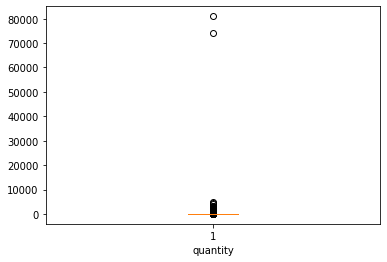

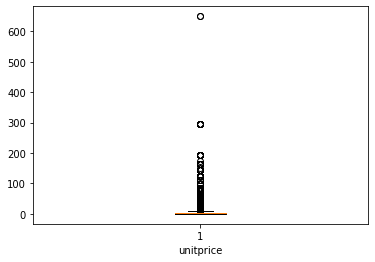

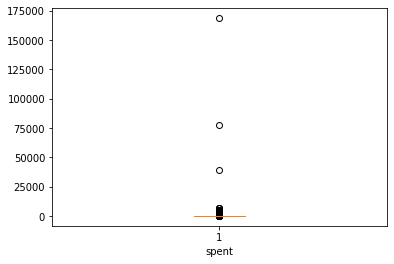

In [47]:
for i in purchases[['quantity', 'unitprice', 'spent']].columns:
    plt.boxplot(purchases[i])
    plt.xlabel('{}'.format(i))
    plt.show()
plt.show();

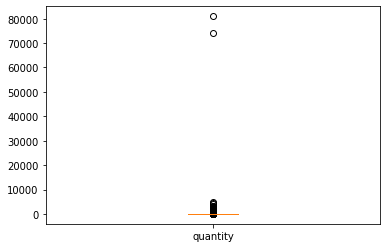

In [48]:
plt.boxplot(x = purchases['quantity'], labels = ['quantity'])
plt.show();

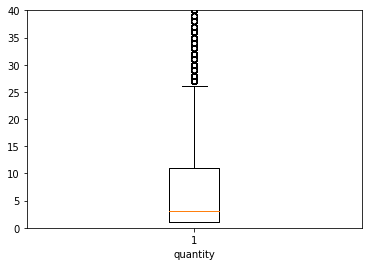

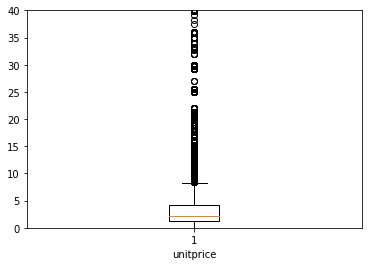

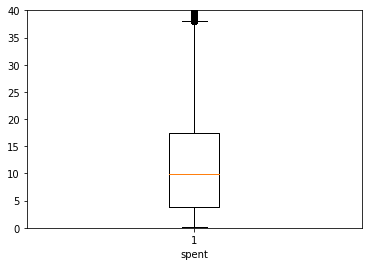

In [49]:
for i in purchases[['quantity', 'unitprice', 'spent']].columns:
    plt.boxplot(purchases[i])
    plt.ylim(0, 40)
    plt.xlabel('{}'.format(i))
    plt.show()
plt.show();

but thats the distribution of all the "rows" in the invoices, so i think ill make first the table i talked about grouping by invoice

In [50]:
# making a mode func
def mode2(x):
    return x.value_counts().index[0]

In [51]:
# making a table by invoice
pur_p_invoice = purchases.groupby('invoiceno').agg(sc_count = ('stockcode', 'nunique'), mode_sc = ('stockcode', mode2), 
                total_qty = ('quantity', 'sum'), invoice_dt = ('invoice_dt', 'first'), avg_price = ('unitprice', 'mean'), 
                                                   total_spent = ('spent', 'sum')).reset_index()
pur_p_invoice.head()
pur_p_invoice.shape[0]

,invoiceno,sc_count,mode_sc,total_qty,invoice_dt,avg_price,total_spent
0,536365,7,84406b,40,2018-11-29 08:26:00,3.910000,139.12
1,536366,2,22632,12,2018-11-29 08:28:00,1.850000,22.20
2,536367,12,48187,83,2018-11-29 08:34:00,4.853333,278.73
3,536368,4,22913,15,2018-11-29 08:34:00,4.775000,70.05
4,536369,1,21756,3,2018-11-29 08:35:00,5.950000,17.85


19776

* now lets check the distribution of those columns per invoice
<s>* about unitprice: i need to find how frequently people buy each unit price group?</s>

In [52]:
df = pur_p_invoice[['total_qty', 'avg_price', 'total_spent', 'sc_count']]

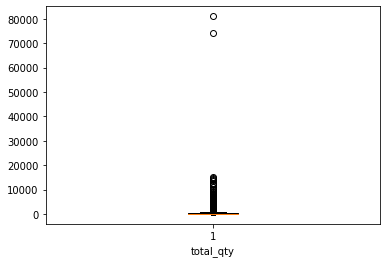

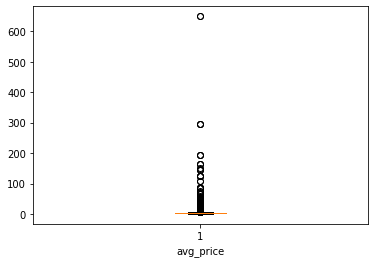

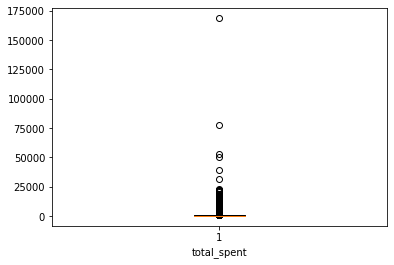

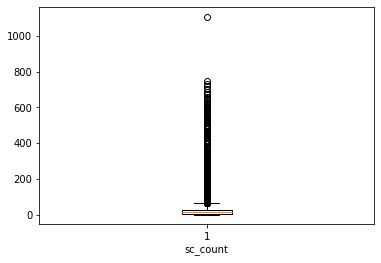

In [53]:
for i in df.columns:
    plt.boxplot(df[i])
    plt.xlabel('{}'.format(i))
    plt.show()
plt.show();

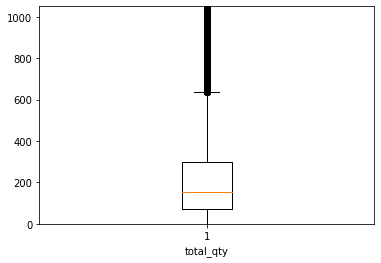

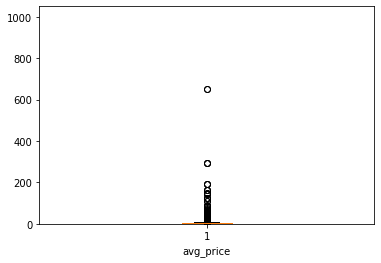

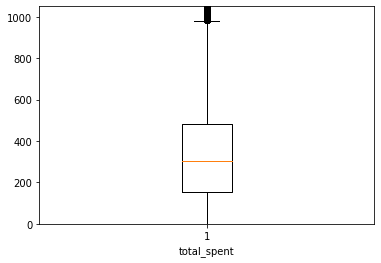

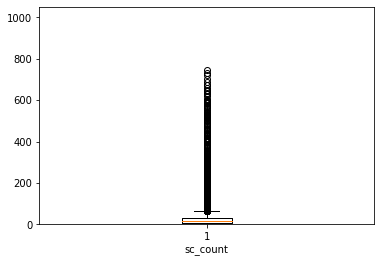

In [54]:
for i in df.columns:
    plt.boxplot(df[i])
    plt.xlabel('{}'.format(i))
    plt.ylim(0, 1050)
    plt.show()
plt.show();

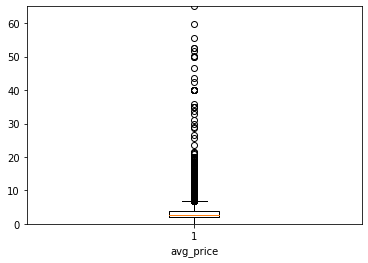

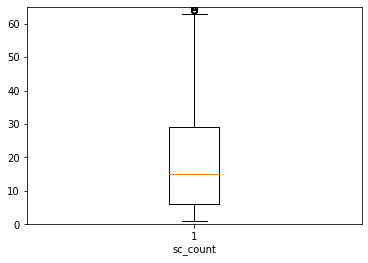

In [55]:
for i in pur_p_invoice[['avg_price', 'sc_count']].columns:
    plt.boxplot(pur_p_invoice[i])
    plt.xlabel('{}'.format(i))
    plt.ylim(0, 65)
    plt.show()
plt.show();

now that its more logical, ill isolate the regular invoices from the abnormal using the graphs above

In [56]:
# defining the regular and abnormal invoices
mask1 = pur_p_invoice['total_qty'] <= 650
mask2 = pur_p_invoice['avg_price'] <= 10
mask3 = pur_p_invoice['total_spent'] <= 1050
mask4 = pur_p_invoice['sc_count'] <= 65
reg_invoice = pur_p_invoice[mask1 & mask2 & mask3 & mask4]['invoiceno'].tolist()
mask1 = pur_p_invoice['total_qty'] > 650
mask2 = pur_p_invoice['avg_price'] > 10
mask3 = pur_p_invoice['total_spent'] > 1050
mask4 = pur_p_invoice['sc_count'] > 65
abnorm_invoice = pur_p_invoice[mask1 | mask2 | mask3 | mask4]['invoiceno'].tolist()
len(reg_invoice)
len(abnorm_invoice)
len(reg_invoice) + len(abnorm_invoice)
pur_p_invoice.shape[0]

16918

2858

19776

19776

ok so ill make a df for the abnormal quantity, unitprice or spent

In [57]:
# difining normal and large purchaces
large_purchases = purchases[purchases['invoiceno'].isin(abnorm_invoice)].reset_index(drop = True)
normal_purchases = purchases[purchases['invoiceno'].isin(reg_invoice)].reset_index(drop = True)

In [58]:
# using describe to see table info
normal_purchases.describe(include = 'all')#, datetime_is_numeric = True)
#normal_purchases['invoicedate'].describe()

,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,spent,stockcode
count,297667,297667.000000,297667,297667.000000,297667,297667.0,297667,297667.000000,297667
unique,16918,NaN,15816,NaN,305,4117.0,3594,NaN,3594
top,536412,NaN,2019-05-08 15:07:00,NaN,2019-11-18 00:00:00,4472.0,white hanging heart t-light holder,NaN,85123a
freq,81,NaN,247,NaN,2067,13606.0,1694,NaN,1694
first,NaN,NaN,2018-11-29 08:26:00,NaN,2018-11-29 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-12-07 12:50:00,NaN,2019-12-07 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,9.452986,NaN,3.010030,NaN,NaN,NaN,16.717333,NaN
std,NaN,17.032139,NaN,3.386086,NaN,NaN,NaN,26.156827,NaN
min,NaN,1.000000,NaN,0.040000,NaN,NaN,NaN,0.060000,NaN
25%,NaN,2.000000,NaN,1.250000,NaN,NaN,NaN,5.000000,NaN


In [59]:
# using describe to see table info
large_purchases.describe(include = 'all')#, datetime_is_numeric = True)
#large_purchases['invoicedate'].describe()

,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,spent,stockcode
count,230232,230232.000000,230232,230232.000000,230232,230232.0,230232,230232.000000,230232
unique,2858,NaN,2850,NaN,303,981.0,3602,NaN,3602
top,573585,NaN,2019-10-29 14:41:00,NaN,2019-12-03 00:00:00,4472.0,jumbo bag red retrospot,NaN,85099b
freq,1112,NaN,1112,NaN,3695,117823.0,697,NaN,697
first,NaN,NaN,2018-11-29 09:09:00,NaN,2018-11-29 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-12-07 10:46:00,NaN,2019-12-07 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,12.002676,NaN,3.624168,NaN,NaN,NaN,23.030186,NaN
std,NaN,235.134468,NaN,5.503404,NaN,NaN,NaN,405.561708,NaN
min,NaN,1.000000,NaN,0.040000,NaN,NaN,NaN,0.060000,NaN
25%,NaN,1.000000,NaN,1.250000,NaN,NaN,NaN,2.950000,NaN


now i have a table to work with

# Step 4. Product Range Analysis

now ill do the same table for returns and then merge them to see the overall picture of each sc

In [60]:
returns.head()
returns.shape[0]

,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,stockcode
0,c537602,1,2018-12-05 12:45:00,2.55,2018-12-05,3901,white hanging heart t-light holder,85123a
1,c538350,1,2018-12-08 15:01:00,2.55,2018-12-08,1178,white hanging heart t-light holder,85123a
2,c538834,1,2018-12-12 13:06:00,2.95,2018-12-12,1628,white hanging heart t-light holder,85123a
3,c539329,500,2018-12-15 09:37:00,2.55,2018-12-15,2808,white hanging heart t-light holder,85123a
4,c539576,24,2018-12-18 12:25:00,2.95,2018-12-18,1995,white hanging heart t-light holder,85123a


8607

since i checked for the best product in normal_purchases, ill look at the same stockcodes in the returns 

In [61]:
# making a normal_returns table based on the items and users from normal_purchases
reg_sc = normal_purchases['stockcode'].unique().tolist()
reg_uid = normal_purchases['suid'].unique().tolist()
mask1 = returns['stockcode'].isin(reg_sc)
mask2 = returns['suid'].isin(reg_uid)
normal_returns = returns[mask1 & mask2].reset_index(drop = True)
normal_returns.head()
normal_returns.shape[0]

,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,stockcode
0,c537602,1,2018-12-05 12:45:00,2.55,2018-12-05,3901,white hanging heart t-light holder,85123a
1,c538350,1,2018-12-08 15:01:00,2.55,2018-12-08,1178,white hanging heart t-light holder,85123a
2,c538834,1,2018-12-12 13:06:00,2.95,2018-12-12,1628,white hanging heart t-light holder,85123a
3,c539329,500,2018-12-15 09:37:00,2.55,2018-12-15,2808,white hanging heart t-light holder,85123a
4,c539576,24,2018-12-18 12:25:00,2.95,2018-12-18,1995,white hanging heart t-light holder,85123a


8291

In [62]:
# adding a refunded column
normal_returns['refunded'] = normal_returns['quantity'] * normal_returns['unitprice']
normal_returns.head(3)

,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,stockcode,refunded
0,c537602,1,2018-12-05 12:45:00,2.55,2018-12-05,3901,white hanging heart t-light holder,85123a,2.55
1,c538350,1,2018-12-08 15:01:00,2.55,2018-12-08,1178,white hanging heart t-light holder,85123a,2.55
2,c538834,1,2018-12-12 13:06:00,2.95,2018-12-12,1628,white hanging heart t-light holder,85123a,2.95


In [63]:
# using describe for more info
normal_returns.describe(include = 'all')

,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,stockcode,refunded
count,8291,8291.000000,8291,8291.000000,8291,8291.0,8291,8291,8291.000000
unique,3315,NaN,3257,NaN,302,1454.0,1855,1855,NaN
top,c560540,NaN,2019-07-17 12:26:00,NaN,2019-10-04 00:00:00,1995.0,regency cakestand 3 tier,22423,NaN
freq,57,NaN,57,NaN,223,212.0,176,176,NaN
first,NaN,NaN,2018-11-29 09:49:00,NaN,2018-11-29 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-12-07 11:58:00,NaN,2019-12-07 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,12.378362,NaN,4.385008,NaN,NaN,NaN,NaN,23.742778
std,NaN,114.230619,NaN,8.896030,NaN,NaN,NaN,NaN,94.075840
min,NaN,1.000000,NaN,0.030000,NaN,NaN,NaN,NaN,0.120000
25%,NaN,1.000000,NaN,1.450000,NaN,NaN,NaN,NaN,3.300000


* again - some invoices were made at the exact same time (possible)
* since i have to include all the items that were included in the purchases, i wont remove the return with 9360 quantity

In [64]:
normal_purchases.head(3)
normal_purchases.shape[0]
normal_returns.head(3)
normal_returns.shape[0]

,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,spent,stockcode
0,536365,6,2018-11-29 08:26:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a
1,536373,6,2018-11-29 09:02:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a
2,536375,6,2018-11-29 09:32:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a


297667

,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,stockcode,refunded
0,c537602,1,2018-12-05 12:45:00,2.55,2018-12-05,3901,white hanging heart t-light holder,85123a,2.55
1,c538350,1,2018-12-08 15:01:00,2.55,2018-12-08,1178,white hanging heart t-light holder,85123a,2.55
2,c538834,1,2018-12-12 13:06:00,2.95,2018-12-12,1628,white hanging heart t-light holder,85123a,2.95


8291

lets try to see again if there is a connection between the return and purchase invoices

In [65]:
# checking how many invoices there are per user and looking at the users that have 4 return invoices
inv_p_uid = normal_returns.groupby('suid').agg(inv_cnt = ('invoiceno', 'nunique')).reset_index()
inv_p_uid[inv_p_uid['inv_cnt'] == 4].head()

,suid,inv_cnt
10,150,4
13,155,4
51,267,4
77,331,4
94,376,4


In [66]:
# looking at the invoices of 1 user in purchases and returns to notice a pattern
normal_returns[normal_returns['suid'] == 155].sort_values('invoiceno')
# designating a stockcode in the purchases to find the same invoice (if this sc was returned)
normal_purchases[(normal_purchases['suid'] == 155) & (normal_purchases['stockcode'] == '22492')]

,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,stockcode,refunded
1193,c545525,86,2019-03-01 13:11:00,1.25,2019-03-01,155,homemade jam scented candles,22969,107.50
3142,c545525,24,2019-03-01 13:11:00,2.55,2019-03-01,155,green regency teacup and saucer,22697,61.20
6672,c551348,100,2019-04-26 09:49:00,4.25,2019-04-26,155,cotton apron pantry design,22990,425.00
396,c560540,36,2019-07-17 12:26:00,0.65,2019-07-17,155,mini paint set vintage,22492,23.40
7181,c560540,1,2019-07-17 12:26:00,2.08,2019-07-17,155,jumbo bag vintage doily,23203,2.08
...,...,...,...,...,...,...,...,...,...
6930,c560540,1,2019-07-17 12:26:00,4.15,2019-07-17,155,childrens cutlery dolly girl,23254,4.15
6937,c560540,1,2019-07-17 12:26:00,4.15,2019-07-17,155,childrens cutlery spaceboy,23256,4.15
4963,c560540,1,2019-07-17 12:26:00,0.42,2019-07-17,155,set 12 kids colour chalk sticks,21918,0.42
8010,c560540,2,2019-07-17 12:26:00,1.65,2019-07-17,155,set 40 heart shape petit four cases,23297,3.30


,invoiceno,quantity,invoice_dt,unitprice,invoicedate,suid,description,spent,stockcode
14152,560491,36,2019-07-17 10:51:00,0.65,2019-07-17,155,mini paint set vintage,23.4,22492


ok so from multiple tries in the cell above it seems like the first 3 digits of the invoice are the same for purchases and returns, and that there are different unitprice for the same stockcode (which is good since that means that it will be easier to match the return to the purchace). lets check it

In [67]:
# checking if there is only 1 invoice in purchases (of the same user) that starts with the first 3 digits in returns invoice
normal_purchases[(normal_purchases['invoiceno'].str.startswith('560'))
                 & (normal_purchases['suid'] == 155)]['invoiceno'].unique()

normal_purchases[(normal_purchases['invoiceno'].str.startswith('563'))
                 & (normal_purchases['suid'] == 115)]['invoiceno'].unique()

array(['560491'], dtype=object)

array(['563037'], dtype=object)

In [68]:
# checking if all invoices start with c
normal_returns['invoiceno'].nunique()
normal_returns['invoiceno'].drop_duplicates().str.startswith('c').value_counts()
# checking that all the invoices in purchases are without letters
normal_purchases['invoiceno'].nunique()
normal_purchases['invoiceno'].drop_duplicates().str.isdigit().value_counts()

3315

True    3315
Name: invoiceno, dtype: int64

16918

True    16918
Name: invoiceno, dtype: int64

all starts with c!

In [69]:
# makiing a column of short invoice to merge by
normal_returns['sinv'] = normal_returns['invoiceno'].str[1:4]
normal_purchases['sinv'] = normal_purchases['invoiceno'].str[1:4]

In [70]:
# merging by all the necessary columns (and description since its the same for both tables) 
normal_ecomm = normal_purchases.merge(normal_returns, on = ['sinv', 'suid', 'stockcode', 'unitprice', 'description'], 
                                      how = 'left', suffixes = ('_p', '_r')#, suffixes = (False, False)
                                     )
normal_ecomm.head(3)
normal_ecomm.shape[0]

,invoiceno_p,quantity_p,invoice_dt_p,unitprice,invoicedate_p,suid,description,spent,stockcode,sinv,invoiceno_r,quantity_r,invoice_dt_r,invoicedate_r,refunded
0,536365,6,2018-11-29 08:26:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a,363,NaN,NaN,NaT,NaT,NaN
1,536373,6,2018-11-29 09:02:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a,363,NaN,NaN,NaT,NaT,NaN
2,536375,6,2018-11-29 09:32:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a,363,NaN,NaN,NaT,NaT,NaN


297667

In [71]:
# slicing into 2 dfs, returned purchases and not returned purchases
#is_ret = normal_ecomm[normal_ecomm['invoiceno_r'].notna()].reset_index(drop = True)
ret_pur = normal_ecomm.dropna().reset_index(drop = True)
not_ret_pur = normal_ecomm[normal_ecomm['invoiceno_r'].isna()].dropna(axis = 1).reset_index(drop = True)
ret_pur.head(3)
ret_pur.shape[0]
not_ret_pur.head(3)
not_ret_pur.shape[0]

,invoiceno_p,quantity_p,invoice_dt_p,unitprice,invoicedate_p,suid,description,spent,stockcode,sinv,invoiceno_r,quantity_r,invoice_dt_r,invoicedate_r,refunded
0,553836,6,2019-05-17 12:08:00,4.25,2019-05-17,3549,jam making set with jars,25.50,22960,538,c538802,4.0,2018-12-12 11:54:00,2018-12-12,17.00
1,557152,1,2019-06-15 11:06:00,8.95,2019-06-15,2281,wood s/3 cabinet ant white finish,8.95,82486,571,c571711,1.0,2019-10-16 16:21:00,2019-10-16,8.95
2,555533,6,2019-06-03 12:12:00,2.95,2019-06-03,2601,heart of wicker large,17.70,22470,555,c555532,2.0,2019-06-03 12:01:00,2019-06-03,5.90


78

,invoiceno_p,quantity_p,invoice_dt_p,unitprice,invoicedate_p,suid,description,spent,stockcode,sinv
0,536365,6,2018-11-29 08:26:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a,363
1,536373,6,2018-11-29 09:02:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a,363
2,536375,6,2018-11-29 09:32:00,2.55,2018-11-29,4148,white hanging heart t-light holder,15.3,85123a,363


297589

its only 78 returns because all the other returns were of purchases that are not in the data! (and now there wont be negative profit [whitch was in different version of this project, way down in the proccess so i rewrote it])

now ill remove the rows where the return happened before the purchase:

In [72]:
ret_pur = ret_pur[ret_pur['invoice_dt_p'] < ret_pur['invoice_dt_r']].reset_index(drop = True)
ret_pur.shape[0]

70

In [73]:
# defining normal returns again
normal_returns = ret_pur[['invoiceno_r', 'sinv', 'invoice_dt_r', 'suid', 'stockcode', 'description', 'quantity_r', 
                          'unitprice', 'refunded']]
normal_returns.columns = ['invoiceno', 'sinv', 'invoice_dt', 'suid', 'stockcode', 'description', 'quantity', 'unitprice', 
                          'refunded']
normal_returns.head(3)

,invoiceno,sinv,invoice_dt,suid,stockcode,description,quantity,unitprice,refunded
0,c571711,571,2019-10-16 16:21:00,2281,82486,wood s/3 cabinet ant white finish,1.0,8.95,8.95
1,c555636,555,2019-06-04 12:33:00,2109,79321,chilli lights,4.0,5.75,23.00
2,c558439,558,2019-06-27 12:53:00,292,22804,candleholder pink hanging heart,2.0,2.95,5.90


now! that we are working only with the relevant returns we can continue

lets see the product that gets us the most and least in different parameters

In [74]:
# grouping per sc
# i didnt do any changes to normal_purchases so ill use it to reuse all the code later
pur_p_sc = normal_purchases.groupby('stockcode').agg(description = ('description', 'first'), 
            total_spent = ('spent', 'sum'), purchases_num = ('suid', 'count'), buyers_num = ('suid', 'nunique'), 
            unitprice = ('unitprice', 'first'), quantity_sold = ('quantity', 'sum')#, invoice_cnt = ('invoiceno', 'nunique')
                                                      ).reset_index()

In [75]:
pur_p_sc.head(3)
pur_p_sc.tail(3)
pur_p_sc.shape[0]

,stockcode,description,total_spent,purchases_num,buyers_num,unitprice,quantity_sold
0,10002,inflatable political globe,420.26,42,30,0.85,488
1,10080,groovy cactus inflatable,107.78,17,15,0.85,274
2,10120,doggy rubber,17.01,19,16,0.21,81


,stockcode,description,total_spent,purchases_num,buyers_num,unitprice,quantity_sold
3591,90214v,"letter ""v"" bling key ring",2.50,2,1,1.25,2
3592,90214y,"letter ""y"" bling key ring",15.17,2,2,1.25,49
3593,c2,carriage,6086.00,122,27,50.00,123


3594

In [76]:
# grouping returns by sc
ret_p_sc = normal_returns.groupby('stockcode').agg(description = ('description', 'first'),
            total_refunded = ('refunded', 'sum'), returns_num = ('suid', 'count'), returners_num = ('suid', 'nunique'), 
            unitprice = ('unitprice', 'first'), quantity_returned = ('quantity', 'sum')
                                                   #, invoice_cnt = ('invoiceno', 'nunique')
                                                      ).reset_index()

In [77]:
ret_p_sc.head(3)
ret_p_sc.tail(3)
ret_p_sc.shape[0]

,stockcode,description,total_refunded,returns_num,returners_num,unitprice,quantity_returned
0,21770,open closed metal sign,29.70,1,1,4.95,6.0
1,22374,airline bag vintage jet set red,4.25,1,1,4.25,1.0
2,22423,regency cakestand 3 tier,25.50,2,2,12.75,2.0


,stockcode,description,total_refunded,returns_num,returners_num,unitprice,quantity_returned
44,84687,beach hut shelf w 3 drawers,11.9,1,1,5.95,2.0
45,84816,danish rose bedside cabinet,79.9,1,1,39.95,2.0
46,85053,french enamel candleholder,8.4,1,1,2.10,4.0


47

In [78]:
ret_p_sc.head(3)
ret_p_sc.shape[0]
pur_p_sc.head(3)
pur_p_sc.shape[0]

,stockcode,description,total_refunded,returns_num,returners_num,unitprice,quantity_returned
0,21770,open closed metal sign,29.70,1,1,4.95,6.0
1,22374,airline bag vintage jet set red,4.25,1,1,4.25,1.0
2,22423,regency cakestand 3 tier,25.50,2,2,12.75,2.0


47

,stockcode,description,total_spent,purchases_num,buyers_num,unitprice,quantity_sold
0,10002,inflatable political globe,420.26,42,30,0.85,488
1,10080,groovy cactus inflatable,107.78,17,15,0.85,274
2,10120,doggy rubber,17.01,19,16,0.21,81


3594

In [79]:
# merging the returns and purchases per sc
all_p_sc = pur_p_sc.merge(ret_p_sc, on = ['stockcode', 'description', 'unitprice'], how = 'left')
all_p_sc = all_p_sc.fillna(0)
all_p_sc.head(3)
all_p_sc.shape[0]

,stockcode,description,total_spent,purchases_num,buyers_num,unitprice,quantity_sold,total_refunded,returns_num,returners_num,quantity_returned
0,10002,inflatable political globe,420.26,42,30,0.85,488,0.0,0.0,0.0,0.0
1,10080,groovy cactus inflatable,107.78,17,15,0.85,274,0.0,0.0,0.0,0.0
2,10120,doggy rubber,17.01,19,16,0.21,81,0.0,0.0,0.0,0.0


3594

now lets find the percentage returned and overall profit

In [80]:
%%capture --no-display
# finding the profit, returned ratio, and other ratios
final_p_sc = all_p_sc[['stockcode', 'description', 'unitprice']]
final_p_sc['profit'] = all_p_sc['total_spent'] - all_p_sc['total_refunded']
final_p_sc['item_ret_ratio'] = all_p_sc['quantity_returned'] / all_p_sc['quantity_sold'] * 100
final_p_sc['not_ret_pur'] = all_p_sc['purchases_num'] - all_p_sc['returns_num']
final_p_sc['return_ratio'] = all_p_sc['returns_num'] / all_p_sc['purchases_num'] * 100
final_p_sc['not_ret_uids'] = all_p_sc['buyers_num'] - all_p_sc['returners_num']
final_p_sc['user_ret_ratio'] = all_p_sc['returners_num'] / all_p_sc['buyers_num'] * 100
final_p_sc.head(3)
final_p_sc.shape[0]

,stockcode,description,unitprice,profit,item_ret_ratio,not_ret_pur,return_ratio,not_ret_uids,user_ret_ratio
0,10002,inflatable political globe,0.85,420.26,0.0,42.0,0.0,30.0,0.0
1,10080,groovy cactus inflatable,0.85,107.78,0.0,17.0,0.0,15.0,0.0
2,10120,doggy rubber,0.21,17.01,0.0,19.0,0.0,16.0,0.0


3594

In [81]:
# checking the info
final_p_sc.describe(include = 'all')

,stockcode,description,unitprice,profit,item_ret_ratio,not_ret_pur,return_ratio,not_ret_uids,user_ret_ratio
count,3594,3594,3594.000000,3594.000000,3594.000000,3594.000000,3594.000000,3594.000000,3594.000000
unique,3594,3594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,21744,tea party birthday card,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.518740,1384.019894,0.026664,82.806066,0.018016,56.868670,0.022284
std,NaN,NaN,6.852119,3252.757505,0.584953,129.793904,0.328880,74.608316,0.354306
min,NaN,NaN,0.100000,0.290000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,1.250000,87.240000,0.000000,10.000000,0.000000,8.000000,0.000000
50%,NaN,NaN,2.080000,401.535000,0.000000,35.000000,0.000000,30.000000,0.000000
75%,NaN,NaN,4.150000,1303.165000,0.000000,101.000000,0.000000,75.000000,0.000000


<s>somehow (even though i removed all the users and items from returns that are not present in purchases) there is a negative profit and number of users that bought and not returned the item.. guess ill remove those items when ill deal with the worst items</s><br>
now everything seems logicall

now i can start looking at the best and worst

In [82]:
# finding the top scs based on different parameters (i payed attention to where its head or tail)
top_profit = final_p_sc[['stockcode', 'description', 'unitprice', 'profit']].sort_values('profit').tail(300)
top_item_ret_ratio = final_p_sc[['stockcode', 'item_ret_ratio']].sort_values('item_ret_ratio').head(300)
top_not_ret_pur = final_p_sc[['stockcode', 'not_ret_pur']].sort_values('not_ret_pur').tail(300)
top_return_ratio = final_p_sc[['stockcode', 'return_ratio']].sort_values('return_ratio').head(300)
top_not_ret_uids = final_p_sc[['stockcode', 'not_ret_uids']].sort_values('not_ret_uids').tail(300)
top_user_ret_ratio = final_p_sc[['stockcode', 'user_ret_ratio']].sort_values('user_ret_ratio').head(300)

In [83]:
# merging the dfs
top_dfs = [top_profit, top_item_ret_ratio, top_not_ret_pur, top_return_ratio, top_not_ret_uids, top_user_ret_ratio]
best_items = reduce(lambda left, right: pd.merge(left, right, on = 'stockcode'), top_dfs)
best_items.sort_values('profit', ascending = False)

,stockcode,description,unitprice,profit,item_ret_ratio,not_ret_pur,return_ratio,not_ret_uids,user_ret_ratio
9,48138,doormat union flag,7.95,13991.79,0.0,453.0,0.0,266.0,0.0
8,48187,doormat new england,7.95,9389.52,0.0,420.0,0.0,259.0,0.0
7,48194,doormat hearts,7.95,8629.83,0.0,409.0,0.0,240.0,0.0
6,48184,doormat english rose,7.95,7238.52,0.0,282.0,0.0,188.0,0.0
5,71459,hanging jam jar t-light holder,0.85,7094.99,0.0,317.0,0.0,197.0,0.0
4,47590b,pink happy birthday bunting,5.45,7085.66,0.0,285.0,0.0,196.0,0.0
3,23581,jumbo bag paisley park,1.79,6352.70,0.0,253.0,0.0,188.0,0.0
2,47590a,blue happy birthday bunting,5.45,5947.70,0.0,274.0,0.0,185.0,0.0
1,35970,zinc folkart sleigh bells,4.21,5448.25,0.0,254.0,0.0,203.0,0.0
0,47591d,pink fairy cake childrens apron,1.95,4140.73,0.0,327.0,0.0,194.0,0.0


The best products overall are:
* doormat union flag
* doormat new england
* doormat hearts	
* doormat english rose
* hanging jam jar t-light holder

it seems doormats fly!

now ill make a list of the top items per parameter

In [84]:
# making a list of top items
top_sc = []
c = 0
for df in top_dfs:
    if c % 2 == 0:
        top_sc.extend(df['stockcode'].tail(10).tolist())
    else:
        top_sc.extend(df['stockcode'].head(10).tolist())
    c += 1
top_sc = list(set(top_sc))
len(top_sc)

28

In [85]:
# making a df of those items for more info in them
items_to_sell_more = final_p_sc[final_p_sc['stockcode'].isin(top_sc)].reset_index(drop = True)
items_to_sell_more.head()
items_to_sell_more.shape[0]

,stockcode,description,unitprice,profit,item_ret_ratio,not_ret_pur,return_ratio,not_ret_uids,user_ret_ratio
0,10002,inflatable political globe,0.85,420.26,0.0,42.0,0.0,30.0,0.0
1,20725,lunch bag red retrospot,1.65,17234.59,0.0,1019.0,0.0,452.0,0.0
2,21212,pack of 72 retrospot cake cases,0.42,7846.96,0.0,724.0,0.0,498.0,0.0
3,22086,paper chain kit 50's christmas,2.55,25955.60,0.0,787.0,0.0,507.0,0.0
4,22178,victorian glass hanging t-light,1.25,24116.85,0.0,732.0,0.0,369.0,0.0


28

now lets do the same for the least selling product

In [86]:
# finding the worst scs based on different parameters (i payed attention to where its head or tail)
min_profit = final_p_sc[['stockcode', 'description', 'unitprice', 'profit']].sort_values('profit').head(300)
min_item_ret_ratio = final_p_sc[['stockcode', 'item_ret_ratio']].sort_values('item_ret_ratio').tail(300)
min_not_ret_pur = final_p_sc[['stockcode', 'not_ret_pur']].sort_values('not_ret_pur').head(300)
min_return_ratio = final_p_sc[['stockcode', 'return_ratio']].sort_values('return_ratio').tail(300)
min_not_ret_uids = final_p_sc[['stockcode', 'not_ret_uids']].sort_values('not_ret_uids').head(300)
min_user_ret_ratio = final_p_sc[['stockcode', 'user_ret_ratio']].sort_values('user_ret_ratio').tail(300)

In [87]:
# merging the dfs
min_dfs = [min_profit, min_item_ret_ratio, min_not_ret_pur, min_return_ratio, min_not_ret_uids, min_user_ret_ratio]
worst_product = reduce(lambda left, right: pd.merge(left, right, on = 'stockcode'), min_dfs)
worst_product

,stockcode,description,unitprice,profit,item_ret_ratio,not_ret_pur,return_ratio,not_ret_uids,user_ret_ratio
0,22323,pink polkadot kids bag,1.95,1.95,0.0,1.0,0.0,1.0,0.0


The worst product overall is:
* pink polkadot kids bag

now ill make a list of the worst items per parameter

In [88]:
# making a list of top items
bad_sc = []
c = 0
for df in min_dfs:
    if c % 2 == 0:
        bad_sc.extend(df['stockcode'].head(10).tolist())
    else:
        bad_sc.extend(df['stockcode'].tail(10).tolist())
    c += 1
bad_sc = list(set(bad_sc))
len(bad_sc)

42

In [89]:
# making a df of those items for more info in them
items_to_remove = final_p_sc[final_p_sc['stockcode'].isin(bad_sc)].reset_index(drop = True)
items_to_remove.head()
items_to_remove.shape[0]

,stockcode,description,unitprice,profit,item_ret_ratio,not_ret_pur,return_ratio,not_ret_uids,user_ret_ratio
0,17174,asstd rasta key-chains,0.42,0.42,0.000000,1.0,0.000000,1.0,0.000000
1,20701,pink cat floral cushion cover,3.75,3.75,0.000000,1.0,0.000000,1.0,0.000000
2,21491,set of three vintage gift wraps,1.95,1.95,0.000000,1.0,0.000000,1.0,0.000000
3,22184,cake stand victorian filigree large,8.50,17.00,0.000000,1.0,0.000000,1.0,0.000000
4,22679,french blue metal door sign 4,1.25,613.19,2.053388,77.0,1.282051,42.0,2.325581


42

## Conclusion
The best products overall are:
* doormat union flag
* doormat new england
* doormat hearts	
* doormat english rose
* hanging jam jar t-light holder

it seems doormats fly!

The worst product overall is:
* pink polkadot kids bag

#### Finding most common combinations of products

In [90]:
# making a basket
basket = normal_purchases.groupby(['invoiceno', 'description'])['stockcode'].nunique().unstack().reset_index().fillna(0
                                                                                                ).set_index('invoiceno')

In [91]:
# using apriori to find the frequent_itemsets
frequent_itemsets_03 = apriori(basket, min_support = 0.03, use_colnames = True, low_memory = True)

In [92]:
# using association_rules to find the rules
rules = association_rules(frequent_itemsets_03, metric = 'lift', min_threshold = 1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(jumbo bag pink polkadot),(jumbo bag red retrospot),0.050006,0.083048,0.031387,0.627660,7.557825,0.027234,2.462672
1,(jumbo bag red retrospot),(jumbo bag pink polkadot),0.083048,0.050006,0.031387,0.377936,7.557825,0.027234,1.527164


In [93]:
frequent_itemsets_01 = apriori(basket, min_support = 0.01, use_colnames = True, low_memory = True)

In [94]:
rules = association_rules(frequent_itemsets_01, metric = 'lift', min_threshold = 1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(pack of 72 retrospot cake cases),(60 teatime fairy cake cases),0.041967,0.025949,0.011290,0.269014,10.367153,0.010201,1.332517
1,(60 teatime fairy cake cases),(pack of 72 retrospot cake cases),0.025949,0.041967,0.011290,0.435080,10.367153,0.010201,1.695873
2,(alarm clock bakelike green),(alarm clock bakelike ivory),0.037298,0.021161,0.012531,0.335975,15.877148,0.011742,1.474099
3,(alarm clock bakelike ivory),(alarm clock bakelike green),0.021161,0.037298,0.012531,0.592179,15.877148,0.011742,2.360599
4,(alarm clock bakelike pink),(alarm clock bakelike green),0.027426,0.037298,0.014895,0.543103,14.561369,0.013872,2.107047


so the items that are mostly sell together are:
* (jumbo bag red retrospot)	& (jumbo bag pink polkadot)
* <s>(60 teatime fairy cake cases) & (pack of 60 dinosaur cake cases)</s>
* <s>(60 teatime fairy cake cases)	& (pack of 60 pink paisley cake cases)</s>
* (60 teatime fairy cake cases) & (pack of 72 retrospot cake cases)
* (alarm clock bakelike green) & (alarm clock bakelike ivory)
* (alarm clock bakelike green) & (alarm clock bakelike pink)

so nothing out of the ordinary

# Statistical Hypothesis Test
* does longer description affects the item sales

In [95]:
pur_p_sc.head()
pur_p_sc.shape[0]
all_p_sc.head()
all_p_sc.shape[0]
final_p_sc.head()
final_p_sc.shape[0]

,stockcode,description,total_spent,purchases_num,buyers_num,unitprice,quantity_sold
0,10002,inflatable political globe,420.26,42,30,0.85,488
1,10080,groovy cactus inflatable,107.78,17,15,0.85,274
2,10120,doggy rubber,17.01,19,16,0.21,81
3,10123c,hearts wrapping tape,2.60,2,2,0.65,4
4,10124a,spots on red bookcover tape,6.72,5,5,0.42,16


3594

,stockcode,description,total_spent,purchases_num,buyers_num,unitprice,quantity_sold,total_refunded,returns_num,returners_num,quantity_returned
0,10002,inflatable political globe,420.26,42,30,0.85,488,0.0,0.0,0.0,0.0
1,10080,groovy cactus inflatable,107.78,17,15,0.85,274,0.0,0.0,0.0,0.0
2,10120,doggy rubber,17.01,19,16,0.21,81,0.0,0.0,0.0,0.0
3,10123c,hearts wrapping tape,2.60,2,2,0.65,4,0.0,0.0,0.0,0.0
4,10124a,spots on red bookcover tape,6.72,5,5,0.42,16,0.0,0.0,0.0,0.0


3594

,stockcode,description,unitprice,profit,item_ret_ratio,not_ret_pur,return_ratio,not_ret_uids,user_ret_ratio
0,10002,inflatable political globe,0.85,420.26,0.0,42.0,0.0,30.0,0.0
1,10080,groovy cactus inflatable,0.85,107.78,0.0,17.0,0.0,15.0,0.0
2,10120,doggy rubber,0.21,17.01,0.0,19.0,0.0,16.0,0.0
3,10123c,hearts wrapping tape,0.65,2.60,0.0,2.0,0.0,2.0,0.0
4,10124a,spots on red bookcover tape,0.42,6.72,0.0,5.0,0.0,5.0,0.0


3594

first ill make a desc_len column

In [96]:
all_p_sc['desc_len'] = all_p_sc['description'].str.len()
final_p_sc['desc_len'] = final_p_sc['description'].str.len()
# looking at the corr of desc_len to all the other metrics
all_p_sc.corr().tail(1)#['desc_len']
final_p_sc.corr().tail(1)#['desc_len']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_spent,purchases_num,buyers_num,unitprice,quantity_sold,total_refunded,returns_num,returners_num,quantity_returned,desc_len
desc_len,-0.050179,-0.048173,-0.042066,0.018621,-0.045532,0.00922,0.009875,0.002462,0.011096,1.0


,unitprice,profit,item_ret_ratio,not_ret_pur,return_ratio,not_ret_uids,user_ret_ratio,desc_len
desc_len,0.018621,-0.050263,0.008789,-0.048211,0.007275,-0.042078,0.008838,1.0


the highest correlation for desc length is profit, (but its very small, so there is no significant correlation) so ill do the test for it

**Testing the hypothesis: "The average profit of items with long description is different than the items with short description."**

now lets define what is and isnt a long description

In [97]:
final_p_sc['desc_len'].describe()
final_p_sc['desc_len'].mean()
(final_p_sc['desc_len'].mean() + final_p_sc['desc_len'].median()) / 2

count    3594.000000
mean       26.873957
std         5.167764
min         7.000000
25%        24.000000
50%        28.000000
75%        31.000000
max        35.000000
Name: desc_len, dtype: float64

26.87395659432387

27.436978297161936

lets say that 27 and below is short desc, and 28 and above is long desc

In [98]:
# creating tables for long and short desc
long_desc = final_p_sc[final_p_sc['desc_len'] > 27]
short_desc = final_p_sc[final_p_sc['desc_len'] < 28]
long_desc.shape[0]
short_desc.shape[0]

1800

1794

In [99]:
# creating series of profit for long and short desc
long_desc_profit = long_desc['profit']
short_desc_profit = short_desc['profit']

# calculating the mean for each
l_desc_p_mean = long_desc_profit.mean()
s_desc_p_mean = short_desc_profit.mean()

# now ill check if the var is equal
'long_desc profit var:',np.var(long_desc_profit)
'short_desc profit var',np.var(short_desc_profit)

('long_desc profit var:', 7873238.398498221)

('short_desc profit var', 13244060.25246865)

To test this hypothesis first we need to define H0 and H1.
* H0: Mean(long_desc) == Mean(short_desc)
* H1: Mean(long_desc) != Mean(short_desc)
* To test it, we'll apply the method scipy.stats.ttest_ind (array1, array2, equal_var). <br>
equal_var = False  because the variance of the samples is different.

alpha = 5% by convention.

In [100]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(long_desc_profit, short_desc_profit, equal_var = False, nan_policy = 'omit')

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the average profit of long_desc is different than the items with short_desc.")
    if l_desc_p_mean > s_desc_p_mean:
        print('long_desc profit is higher than short_desc profit on average.')
    else:
        print('short_desc profit is higher than long_desc profit on average.')
else:
    print("We can't reject the null hypothesis, the average profit of long_desc and short description can be the same.")

p-value:  0.004889326556551269
We reject the null hypothesis, the average profit of long_desc is different than the items with short_desc.
short_desc profit is higher than long_desc profit on average.


# Conclusion

Based on the data and the analysis i did there are 3 points i arrived at:
* Best remove all the items in the bad_sc list and double down on the top_sc list
* Make reccomendations to buy other cake cases when there is a purchase of a cake case
* There is no significant correlation between the desc length and any sale metric, but the highest is to profit, and from conducting a statistical test, its better to shorten the descriptions

Tableau dashboard: <br>
https://public.tableau.com/views/TopItemsByProfit/EcommerceProductRange?:language=en-US&:display_count=n&:origin=viz_share_link

PDF Presentation: <br>
https://files.trom.tf/s/No4WtYtdHSTmn5y